<a href="https://colab.research.google.com/github/jpriyam/SHALA2020/blob/master/Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x: 0 if x=="male" else 1)
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data['Age'].fillna((titanic_data['Age'].mean()), inplace=True)
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
t=titanic_data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [0]:
t.head()
t['Embarked'].fillna((t['Embarked'].mode()[0]), inplace=True)
#

In [10]:
t.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
t=pd.get_dummies(data=t, columns=['Embarked'])
t.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [0]:
X = t.drop(['Survived'], axis = 1)
y = t['Survived']

**Decision tree for classification**

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import classification_report,precision_recall_curve

In [0]:
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [0]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 12
dt = DecisionTreeClassifier(max_depth=12, random_state=1) 

In [16]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [17]:
#Predict test set labels
y_pred = dt.predict(X_test)
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.82


In [18]:
y_pred = dt.predict(X_train)
print('Accuracy Train set: ',metrics.accuracy_score(y_train, y_pred))

y_pred = dt.predict(X_test)
print('Accuracy Test set: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Train set:  0.9508426966292135
Accuracy Test set:  0.8212290502793296


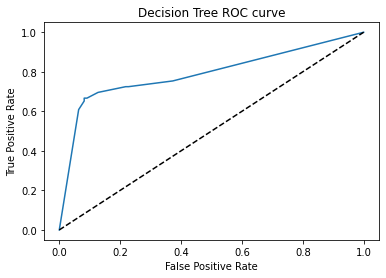

In [19]:
from sklearn.metrics import roc_curve  
probs = dt.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

**Voting Classifier**

In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
SEED = 1


In [0]:
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(max_depth=10, random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]


In [22]:
import warnings
warnings.filterwarnings("ignore")
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.788
K Nearest Neighbours : 0.698
Classification Tree : 0.832


In [25]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers, voting='soft')
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

Voting classifier:  0.832


In [26]:
y_pred = vc.predict(X_train)
print('Accuracy Train set: ',metrics.accuracy_score(y_train, y_pred))

y_pred = vc.predict(X_test)
print('Accuracy Test set: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Train set:  0.9269662921348315
Accuracy Test set:  0.8324022346368715


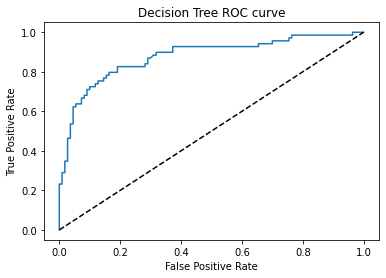

In [40]:
from sklearn.metrics import roc_curve  
probs = vc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

**Bagging**

In [0]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1

In [28]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=0.05, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) # n_jobs=-1 means that all the CPU cores are used in computation. 
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.827


In [29]:
y_pred = bc.predict(X_train)
print('Accuracy Train set: ',metrics.accuracy_score(y_train, y_pred))

y_pred = bc.predict(X_test)
print('Accuracy Test set: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Train set:  0.800561797752809
Accuracy Test set:  0.8268156424581006


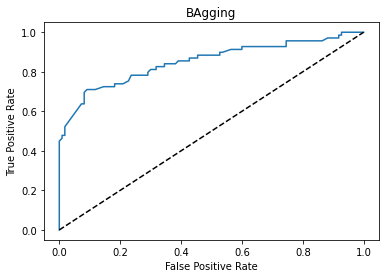

In [30]:
from sklearn.metrics import roc_curve  
probs = bc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BAgging')
# show the plot
plt.show()


**Random Forests**

In [0]:
# Basic imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1

In [0]:
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.05, random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [33]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 0.40


In [34]:
y_pred = rf.predict(X_train)
print('Accuracy Train set: ',metrics.accuracy_score(y_train, y_pred))

y_pred = rf.predict(X_test)
print('Accuracy Test set: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Train set:  0.8103932584269663
Accuracy Test set:  0.8435754189944135


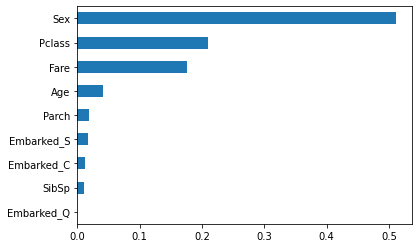

In [35]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh'); 
plt.show()

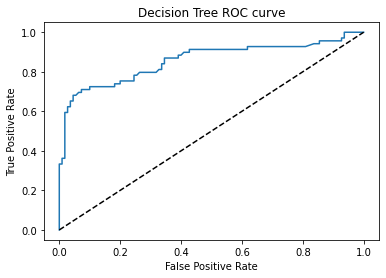

In [41]:
from sklearn.metrics import roc_curve  
probs = rf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

**Boosting**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier(max_depth=10, random_state=7)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=7, learning_rate=0.000005)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

print('The training results are :')
print(classification_report(y_train, adb_clf.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, adb_clf.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       439
           1       0.98      0.85      0.91       273

    accuracy                           0.94       712
   macro avg       0.95      0.92      0.93       712
weighted avg       0.94      0.94      0.94       712

The testing results are :
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



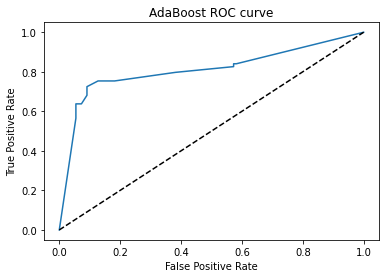

In [38]:
from sklearn.metrics import roc_curve  

y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC curve')
# show the plot
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.81
